    admit  mark
0       0  3.61
1       1  3.67
2       1  4.00
3       1  3.19
4       0  2.93
5       1  3.00
6       1  2.98
7       0  3.08
8       1  3.39
9       0  3.92
10      0  4.00
11      0  3.22
12      1  4.00
значения средних баллов учащихся , кто не поступил:  [3.61, 2.93, 3.08, 3.92, 4.0, 3.22]
значения средних баллов учащихся , кто поступил:  [3.67, 4.0, 3.19, 3.0, 2.98, 3.39, 4.0]


<AxesSubplot: xlabel='admit', ylabel='mark'>

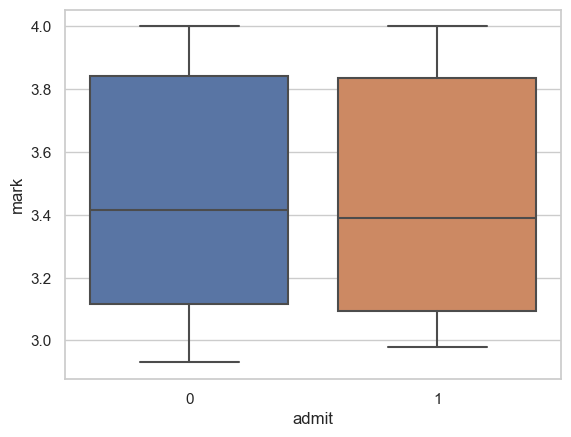

In [1]:
dataADM=[0,1,1,1,0,1,1,0,1,0,0,0,1]
dataMARK=[3.61,3.67,4,3.19,2.93,3,2.98,3.08,3.39,3.92,4.0,3.22,4]

import pandas as pd

# записываем данные в таблицу
df = pd.DataFrame({"admit": dataADM, "mark": dataMARK})
print(df)

A = df["admit"]
B = df["mark"]
x0=[] #массив оценок для " не поступил"
x1=[] # массив оценок для "поступил"

# загоняем в массивы данные по показателю 0=не поступил, 1=поступил
for i in range(0,13):
    if A[i]==0: x0.append(B[i])
    else: x1.append(B[i])

print('значения средних баллов учащихся , кто не поступил: ', x0)
print('значения средних баллов учащихся , кто поступил: ', x1)

import seaborn
 
# выводим boxplot для поступивших и непоступивших 
seaborn.set(style='whitegrid') 
 
seaborn.boxplot(x='admit', y='mark', data=df)


In [ ]:
# не работает нужно доучивать модель ( и доучиваться самому)

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

dataADM=[0,1,1,1,0,1,1,0,1,0,0,0,1]
dataMARK=[3.61,3.67,4,3.19,2.93,3,2.98,3.08,3.39,3.92,4.0,3.22,4]

import pandas as pd

# записываем данные в таблицу
df = pd.DataFrame({"admit": dataADM, "mark": dataMARK})
print(df)

A = df["admit"]
B = df["mark"]
x0=[] #массив оценок для " не поступил"
x1=[] # массив оценок для "поступил"

model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(B, A)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

model.intercept_
model.coef_

(array([638., 217.,  63.,  36.,  25.,  12.,   6.,   0.,   2.,   1.]),
 array([0.  , 0.96, 1.92, 2.88, 3.84, 4.8 , 5.76, 6.72, 7.68, 8.64, 9.6 ]),
 <BarContainer object of 10 artists>)

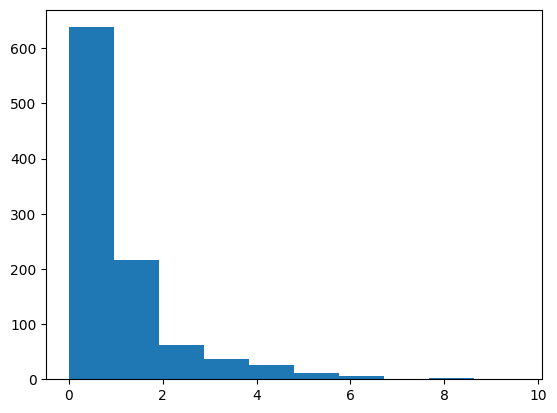

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

n = 60
p = 0.5
N = 10**3

o1 = np.random.binomial(n, p, N)
o2 = np.ndarray((N))
o2.fill(60)
o2 = o2 - o1

e1 = np.ndarray((N))
e1.fill(int(n / 2))
e2 = e1.copy()

simulated_chi_dist = (o1 - e1)**2 / e1 + (o2 - e2)**2 / e2

plt.hist(simulated_chi_dist)

In [17]:
# использует файл train из kaggle по титанику (скачивать нужно, не нашел ссылку тупо на сам файл)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

df = pd.read_csv('train.csv')

df.Survived.value_counts()
intercept=np.log(342/549) # почему так - ясно из кода ниже: 342 выживших и 549 невыживших
print('intercept = ', intercept)
glm_binom2 = smf.glm(formula="Survived ~ 1",data=df, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()
np.exp(-0.4732877044469254) / (1 + np.exp(-0.4732877044469254))
p=1/(np.exp(-intercept)+1) # считаем вероятность выжить
# почему выжить? потому что мы изначально задали это значение для intercept: "survived ~ 1" в строке 17
print('probability =', p)

intercept =  -0.4732877044469254
probability = 0.38383838383838387


In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

df = pd.read_csv('train.csv')
print(df)
A = df['Survived']

survDATA=[]
notsurvDATA=[]

for i in range(0,len(A)):
    if df.Survived[i]==0: notsurvDATA.append(A[i]) # обрати внимание как еще проще вытащить / взять конкретный столбец 
                                                    # из массива/таблицы - чтобы работать только с ним!!!!
    else: survDATA.append(A[i])

print('число выживших =', len(survDATA), ', число погибших =', len(notsurvDATA) )

     PassengerId  Survived  Pclass  \
0              1         0       3   
1              2         1       1   
2              3         1       3   
3              4         1       1   
4              5         0       3   
..           ...       ...     ...   
886          887         0       2   
887          888         1       1   
888          889         0       3   
889          890         1       1   
890          891         0       3   

                                                  Name     Sex   Age  SibSp  \
0                              Braund, Mr. Owen Harris    male  22.0      1   
1    Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                               Heikkinen, Miss. Laina  female  26.0      0   
3         Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                             Allen, Mr. William Henry    male  35.0      0   
..                                                 ...     ...   ... 

In [23]:
# это чисто расчеты из примера stepic по этой теме "Модель без предикторов"

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats


intercept=np.log(290/424) # почему так - ясно из кода ниже: 342 выживших и 549 невыживших
print('intercept = ', intercept)

np.exp(-0.4732877044469254) / (1 + np.exp(-0.4732877044469254))
p=1/(np.exp(-intercept)+1)
odds=np.exp(intercept)
print('odds =', odds, ', probability =', p)

print(intercept/0.0762)

intercept =  -0.379852532251438
odds = 0.6839622641509434 , probability = 0.40616246498599434
-4.984941368129108


In [138]:
# легкий способ посчитать всех погибших и всех выживших

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
#display(df)


NS=len(df[df['Survived'] == 1])
NNS=len(df[df['Survived']== 0])

print('число выживших =', NS, ', число погибших =', NNS )

число выживших = 342 , число погибших = 549


In [60]:
# Модель с одним номинативным предиктором - пол (sex )

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('train.csv')
display(df)

# удобная штука посчитать сколько в столбце градаций переменной Sex (тупо сколько частот одного значения, сколько другого)
# сколько мужчин, а сколько женщин
Nmale=len(df[df['Sex']== 'male'])
Nfemale=len(df[df['Sex']== 'female'])

print('number of male =', Nmale, ', number of female=', Nfemale)

dataSEX=df['Sex']
dataSURV=df['Survived']


NmaleS=0 #число выживших мужиков
NmaleNS=0 # число невыживших мужиков
NfemaleS=0 #число выживших баб
NfemaleNS=0 # число невыживших баб
for i in range(0,len(dataSEX)):
    if dataSEX[i]=='male':
        if dataSURV[i]==1: NmaleS+=1
        else: NmaleNS+=1

    else:
        if dataSURV[i]==1: NfemaleS+=1
        else: NfemaleNS+=1 


male=[NmaleS,NmaleNS, NmaleS+NmaleNS]
female=[NfemaleS,NfemaleNS, NfemaleS+NfemaleNS]
total2=[(NmaleS+NfemaleS), (NmaleNS+NfemaleNS), ((NmaleS+NmaleNS)+(NfemaleS+NfemaleNS))]


# создадим пустую таблицу сопряженности (как это сделать в две строки - см ниже!!!)
tab_sopr = pd.DataFrame({
    'NaN': ['Survived', 'Not surveved', 'total1'],
    'male': male,
    'female': female,
    'total2':total2
})
display(tab_sopr)

#выводим для себя только некоторые столбцы: только Survived and sex
#df = df.reset_index(drop=False)
#df = df[['Survived', 'Sex']]
#display(df)


df.Survived.value_counts()

# готовим регрессионную модель с одним предиктором - пол
glm_binom2 = smf.glm(formula="Survived ~ Sex",data=df, family=sm.families.Binomial())
model = glm_binom2.fit()
model.summary()



#p=1/(np.exp(-intercept)+1) # считаем вероятность выжить
# почему выжить? потому что мы изначально задали это значение для intercept: "survived ~ 1" в строке 17
#print('probability =', p)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


number of male = 577 , number of female= 314


,NaN,male,female,total2
0,Survived,109,233,342
1,Not surveved,468,81,549
2,total1,577,314,891


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Mon, 07 Nov 2022   Deviance:                       917.80
Time:                        12:16:10   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
Sex[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
===============================================================================
"""

In [95]:
# как эффектно и эффективно создать таблицу сопряженности crosstab на примере задачи выше
# https://pandas.pydata.org/pandas-docs/stable/user_guide/reshaping.html#reshaping-crosstabulations

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('train.csv')
#display(df)

#dataSEX=df['Sex']
#dataSURV=df['Survived']

tab_sopr=pd.crosstab(df['Survived'],df['Sex'], 
            rownames=['survived'], 
            colnames=['sex'],
            margins = True)  # эта строка выдает сумму результатов (если False - не будет выдавать сумму строк/столбцов)
display(tab_sopr)

# как взять конкретные значения из полученной crosstable: 
# https://translated.turbopages.org/proxy_u/en-ru.ru.ec952d28-6368badc-d4fd710b-74722d776562/https/www.geeksforgeeks.org/how-to-get-cell-value-from-pandas-dataframe/
a=tab_sopr['male'].loc[tab_sopr.index[0]] 
b=(tab_sopr['male'].loc[tab_sopr.index[1]]) 
c=(tab_sopr['male'].loc[tab_sopr.index[2]]) 
d=(tab_sopr['female'].loc[tab_sopr.index[0]]) 
e=(tab_sopr['female'].loc[tab_sopr.index[1]])
f=(tab_sopr['female'].loc[tab_sopr.index[2]]) 

odds_male=b/a
odds_female=e/d

print('шанс выжить для мужчин =', odds_male, 'шанс выжить для женщин =', odds_female)
print(' логарифм шансов для мужчин =', np.log(odds_male))
print(' логарифм шансов для женщин =', np.log(odds_female) ) # см значение intercept в таблице выше
print(' логарифм отношения шансов мужчин к женщинам = ', np.log(odds_male/odds_female)) # см значение sexmale


sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


шанс выжить для мужчин = 0.2329059829059829 шанс выжить для женщин = 2.876543209876543
 логарифм шансов для мужчин = -1.457120413688503  логарифм шансов для женщин = 1.0565892988932617
 логарифм отношения шансов мужчин к женщинам =  -2.5137097125817647


In [ ]:
import pandas as pd 

import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats

#perform two-way ANOVA
model = ols('expr ~ age + dose + age:dose', data).fit()
sm.stats.anova_lm(model, typ=2)

In [122]:
# сравнение моделей : нулевая и одним предиктором(пол)

# НЕ ПОНИМАЮ, ЕРУНДУ НАПИСАЛ, НЕ РАБОТАЕТ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats
from statsmodels.formula.api import ols

df = pd.read_csv('train.csv')
#display(df)

# удобная штука посчитать сколько в столбце градаций переменной Sex (тупо сколько частот одного значения, сколько другого)
# сколько мужчин, а сколько женщин
Nmale=len(df[df['Sex']== 'male'])
Nfemale=len(df[df['Sex']== 'female'])

# таблица сопряженности crosstable
tab_sopr=pd.crosstab(df['Survived'],df['Sex'], 
            rownames=['survived'], 
            colnames=['sex'],
            margins = True)  # эта строка выдает сумму результатов (если False - не будет выдавать сумму строк/столбцов)
display(tab_sopr)

df.Survived.value_counts()

# готовим регрессионную модель с одним предиктором - пол
glm_binom2 = smf.glm(formula="Survived ~ Sex",data=df, family=sm.families.Binomial())
model1 = glm_binom2.fit()
#model1.summary()

# готовим регрессионную модель без предикторов вообще - нулевая модель
glm_binom0 = smf.glm(formula="Survived ~ 1",data=df, family=sm.families.Binomial())
model2 = glm_binom0.fit()
#model2.summary()

model = ols(model1,model2, chi2).fit()
sm.stats.anova_lm(model, typ=2)

#chi2, prob, df, expected = stats.chi2_contingency(observed=tab_sopr, correction=False) 
#output = "Chi2: {}\ndegrees of freedom: {}\np-value: {}\n"
#print(output.format( chi2, df, prob))


sex,female,male,All
survived,,,
0,81,468,549
1,233,109,342
All,314,577,891


AttributeError: 'GLMResults' object has no attribute 'loc'

In [129]:
# Модель без предикторов (нулевая)
#https://github.com/lubistick/DataScience/blob/master/Logistic%20regression.ipynb ссылка на код слушателя лекций

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
display(df)

# удобная штука посчитать сколько в столбце градаций переменной Sex (тупо сколько частот одного значения, сколько другого)
# сколько мужчин, а сколько женщин
Nmale=len(df[df['Sex']== 'male'])
Nfemale=len(df[df['Sex']== 'female'])

# таблица сопряженности crosstable
tab_sopr=pd.crosstab(df['Survived'], df['Sex'], 
            rownames=['survived'], 
            colnames=['sex'],
            margins = True)  # эта строка выдает сумму результатов (если False - не будет выдавать сумму строк/столбцов)
#display(tab_sopr)

df.Survived.value_counts()

# готовим регрессионную модель без предикторов вообще - нулевая модель
glm_binomial = smf.glm(formula="Survived ~ 1",data=df, family=sm.families.Binomial())
model = glm_binomial.fit()
model.summary()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      890
Model Family:                Binomial   Df Model:                            0
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -593.33
Date:                Tue, 08 Nov 2022   Deviance:                       1186.7
Time:                        10:07:46   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):         -2.220e-16
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.4733      0.069     -6.870      0.000      -0.608      -0.338
==============================================================================
"""

In [133]:
# Модель с одним предиктором( пол)
#https://github.com/lubistick/DataScience/blob/master/Logistic%20regression.ipynb ссылка на код слушателя лекций

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
display(df)

# удобная штука посчитать сколько в столбце градаций переменной Sex (тупо сколько частот одного значения, сколько другого)
# сколько мужчин, а сколько женщин
Nmale=len(df[df['Sex']== 'male'])
Nfemale=len(df[df['Sex']== 'female'])

# таблица сопряженности crosstable
tab_sopr=pd.crosstab(df['Survived'], df['Sex'], 
            rownames=['survived'], 
            colnames=['sex'],
            margins = True)  # эта строка выдает сумму результатов (если False - не будет выдавать сумму строк/столбцов)
#display(tab_sopr)

df.Survived.value_counts()

# готовим регрессионную модель без предикторов вообще - нулевая модель
glm_binomial = smf.glm(formula="Survived ~ Sex",data=df, family=sm.families.Binomial())
model = glm_binomial.fit()
model.summary()



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      889
Model Family:                Binomial   Df Model:                            1
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -458.90
Date:                Tue, 08 Nov 2022   Deviance:                       917.80
Time:                        10:24:53   Pearson chi2:                     891.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.2605
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       1.0566      0.129      8.191      0.000       0.804       1.309
Sex[T.male]    -2.5137      0.167    -15.036      0.000      -2.841      -2.186
===============================================================================
"""

'таблица сопряженности для женщин'

Pclass,1,2,3,All
Survived,,,,
0,3,6,72,81
1,91,70,72,233
All,94,76,144,314


'таблица сопряженности для мужчин'

Pclass,1,2,3,All
Survived,,,,
0,77,91,300,468
1,45,17,47,109
All,122,108,347,577


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  891
Model:                            GLM   Df Residuals:                      885
Model Family:                Binomial   Df Model:                            5
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -399.05
Date:                Tue, 08 Nov 2022   Deviance:                       798.10
Time:                        20:56:31   Pearson chi2:                     891.
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3534
Covariance Type:            nonrobust                                         
=================================================================================================
                                    coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
Intercept                         3.4122      0.587      5.815      0.000       2.262       4.562
C(Sex)[T.male]                   -3.9494      0.616     -6.411      0.000      -5.157      -2.742
C(Pclass)[T.2]                   -0.9555      0.725     -1.318      0.187      -2.376       0.465
C(Pclass)[T.3]                   -3.4122      0.610     -5.594      0.000      -4.608      -2.217
C(Sex)[T.male]:C(Pclass)[T.2]    -0.1850      0.794     -0.233      0.816      -1.741       1.371
C(Sex)[T.male]:C(Pclass)[T.3]     2.0958      0.657      3.189      0.001       0.808       3.384
=================================================================================================
"""

intercept равен = 3.41224721784874
sex_male равен = -3.9493901499321042
Pclass2 равен = -0.9555114450274363
Pclass3 равен = -3.41224721784874
Эти значения отношений шансов выжить в разных классах показывают взаимосвязь между полом пассажира и фактором выживет/не выживет В ЗАВИСИМОСТИ ОТ КЛАССА : 0.01926644783787641 0.016012558869701727 0.15666666666666668
Sexmale_Pclass2  равен = -0.1849917853498333
Sexmale_Pclass3  равен = 2.0957552769859618


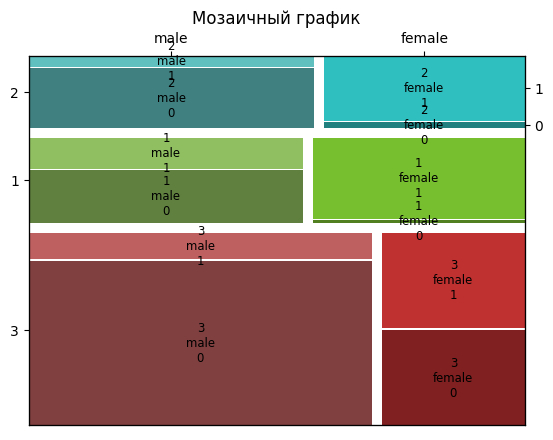

In [35]:
# Модель с двумя предикторами (пол и класс пассажира)
# https://github.com/lubistick/DataScience/blob/master/Logistic%20regression.ipynb здесь все подробно описано

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('train.csv')
#display(df)

# удобная штука посчитать сколько в столбце градаций переменной Sex (тупо сколько частот одного значения, сколько другого)
# сколько мужчин, а сколько женщин
Nmale=len(df[df['Sex']== 'male'])
Nfemale=len(df[df['Sex']== 'female'])

# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для женщин.
cross_table_female = pd.crosstab(df[df.Sex == 'female'].Survived, # этой строкой мы отсекли мужчин
                                 df.Pclass, 
                                 margins = True)  # эта строка выдает сумму результатов (если False - не будет выдавать сумму строк/столбцов)
display('таблица сопряженности для женщин', cross_table_female)

# Таблица сопряженности между переменными выжил/не выжил и классом пассажира для мужчин.
cross_table_male = pd.crosstab(df[df.Sex == 'male'].Survived, # этой строкой мы отсекли женщин
                                 df.Pclass, 
                                 margins = True)  # эта строка выдает сумму результатов (если False - не будет выдавать сумму строк/столбцов)
display('таблица сопряженности для мужчин', cross_table_male)
       
                    

df.Survived.value_counts()

# готовим регрессионную модель с двумя предикторами - пол и класс билета пассажира
# причем буква С перед независимыми предикторами в модели дает ДОПОЛНИТЕЛЬНУЮ ИНФОРМАЦИЮ
# попробуй убрать - и данных станет меньше!
glm_binomial = smf.glm(formula="Survived ~ C(Sex) * C(Pclass)",data=df, family=sm.families.Binomial())
model = glm_binomial.fit()
display(model.summary())


# проверим модель, посчитаем значения estim_coef вручную 

#intercept - это логарифм шансов выжить у женщин 1 класса
intercept=np.log(cross_table_female[1].loc[cross_table_female.index[1]] / cross_table_female[1].loc[cross_table_female.index[0]])
print('intercept равен =', intercept)

# sex_male - это логарифм отношения шансов выжить у мужчин 1 класса к шансу выжить у женщин 1 класса
sex_male=np.log((cross_table_male[1].loc[cross_table_male.index[1]] / cross_table_male[1].loc[cross_table_male.index[0]])/
    (cross_table_female[1].loc[cross_table_female.index[1]] / cross_table_female[1].loc[cross_table_female.index[0]]))
print('sex_male равен =', sex_male)

# Pclass2 - это логарифм отношения шансов выжить у женщин 2 класса к шансу выжить у женщин 1 класса
Pclass2=np.log((cross_table_female[2].loc[cross_table_female.index[1]] / cross_table_female[2].loc[cross_table_female.index[0]])/
    (cross_table_female[1].loc[cross_table_female.index[1]] / cross_table_female[1].loc[cross_table_female.index[0]]))
print('Pclass2 равен =', Pclass2)

# Pclass3 - это логарифм отношения шансов выжить у женщин 3 класса к шансу выжить у женщин 1 класса
Pclass3=np.log((cross_table_female[3].loc[cross_table_female.index[1]] / cross_table_female[3].loc[cross_table_female.index[0]])/
    (cross_table_female[1].loc[cross_table_female.index[1]] / cross_table_female[1].loc[cross_table_female.index[0]]))
print('Pclass3 равен =', Pclass3)


# отношение шансов выжить для пассажиров мужчин относительно шансов женщин в зависимости от класса
odds_m_1=(cross_table_male[1].loc[cross_table_male.index[1]] / 
          cross_table_male[1].loc[cross_table_male.index[0]]) # шансы мужчин в 1 классе
odds_f_1=(cross_table_female[1].loc[cross_table_female.index[1]] / 
          cross_table_female[1].loc[cross_table_female.index[0]]) # шансы женщин в 1 классе

odds_m_2= (cross_table_male[2].loc[cross_table_male.index[1]] / 
           cross_table_male[2].loc[cross_table_male.index[0]]) # шансы мужчин во 2 классе
    
odds_f_2= (cross_table_female[2].loc[cross_table_female.index[1]] / 
           cross_table_female[2].loc[cross_table_female.index[0]]) # шансы женщин во 2 классе

odds_m_3= (cross_table_male[3].loc[cross_table_male.index[1]] / 
           cross_table_male[3].loc[cross_table_male.index[0]]) # шансы мужчин в 3 классе
    
odds_f_3= (cross_table_female[3].loc[cross_table_female.index[1]] / 
           cross_table_female[3].loc[cross_table_female.index[0]]) # шансы женщин в 3 классе

otn1= odds_m_1/odds_f_1
otn2 = odds_m_2/odds_f_2
otn3= odds_m_3/odds_f_3
print('Эти значения отношений шансов выжить в разных классах показывают взаимосвязь между полом пассажира и фактором выживет/не выживет В ЗАВИСИМОСТИ ОТ КЛАССА :', otn1, otn2, otn3)

# Sexmale_Pclass2 - это разница между логарифмом отношений шансов выжить для мужчин и женщин во 2 классе и 
# логарифмом отношений шансов выжить для мужчин и женщин в 1 классе
Sexmale_Pclass2 =np.log(otn2)-np.log(otn1)
print('Sexmale_Pclass2  равен =', Sexmale_Pclass2 )

# Sexmale_Pclass3 - это разница между логарифмом отношений шансов выжить для мужчин и женщин в 3 классе и 
# логарифмом отношений шансов выжить для мужчин и женщин в 1 классе
Sexmale_Pclass3 =np.log(otn3)-np.log(otn1)
print('Sexmale_Pclass3  равен =', Sexmale_Pclass3 )

# График сопряженности между классом пассажира, полом и переменной выжил/не выжил.

from statsmodels.graphics.mosaicplot import mosaic

mosaic(df, ['Pclass', 'Sex', 'Survived'], title='Мозаичный график', horizontal=0, gap=0.03)
plt.show()


#получили модель для оценки абсолютно рандомного пассажира с тремя характеристиками:
# пол Sex_male(0,1); 
#Pclass2 (0,1) - едет ли он вторым классом (да/нет)
#Pclass3 (0,1) - едет ли он третим классом (да/нет)
#PClass2=int
#PClass3=int
#Sex_male=int(input('Введите пол пассажира (0,1): '))
#PClass2=int(input('Введите принадлежность пассажира 2 классу (0,1): '))
#PClass3=int(input('Введите принадлежность пассажира 3 классу (0,1): '))

    
# тогда логарифм шанса выжить для этого пассажира
#log_odd = (3.4122 + (-3.9494)*Sex_male + (-0.9555)*PClass2 + (-3.4122)*PClass3 + 
#           (-0.1850)*Sex_male*PClass2 + 2.0958*Sex_male*PClass3)
#p=(np.exp(-log_odd)+1)**(-1)
#print('логарифм шанса положительного исхода для пассажира = ', log_odd, 'вероятность выжить =', p)



In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

# Сравним модельки по остаткам (см друг за другом)
# чем они будут меньше, тем лучше

#0 модель без предикторов (нулевая)
# здесь остатки равны 1188
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
# в этих строчках мы выводим ВСЮ таблицу на экран
# Сброс ограничений на количество выводимых рядов
#pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
#pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
#pd.set_option('display.max_colwidth', None)
#display(df)
# закончили с выводом ВСЕЙ таблицы на экран

#df = df[df.Age.notnull()] #а вот эта САМАЯ ОХУЕННАЯ строчка - исключили ВСЕХ пассажиров до года , 
# короче говоря ВСЕХ младенцев


#df.head() - это показать только несколько строк из верхушки таблицы

# тут запускаем модель - в данном случае без предикторов
glm_binomial = smf.glm(formula='Survived ~ 1', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()
#display(glm_binomial.summary())
#df.Survived.value_counts() # здесь считаем выживших/погибших БЕЗ УЧЕТА тех, кому меньше 1 года (без младенцев)
glm_binomial.aic # здесь считаем остатки модели (чем они меньше, тем лучше)




1188.6551368246958

In [11]:
# Сравним модельки по остаткам (см друг за другом)
# чем они будут меньше, тем лучше

#1 модель с одним предиктором - пол
# здесь остатки равны 921 - она лучше, чем нулевая модель
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
#df = df[df.Age.notnull()] 
# тут запускаем модель - в данном случае с одним предиктором пол
glm_binomial = smf.glm(formula='Survived ~ Sex', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

glm_binomial.aic # здесь считаем остатки модели (чем они меньше, тем лучше)

921.8039249773078

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

# Сравним модельки по остаткам (см друг за другом)
# чем они будут меньше, тем лучше

#2 модель с двумя предикторами - пол и класс пассажира
# здесь остатки равны 810 - она лучше, чем первая и нулевая
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
#df = df[df.Age.notnull()] #-это занулили младенцев
# тут запускаем модель - в данном случае с одним предиктором пол
glm_binomial = smf.glm(formula='Survived ~ C(Sex)*C(Pclass)', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

glm_binomial.aic # здесь считаем остатки модели (чем они меньше, тем лучше)

810.096898329451

In [9]:
# Сравним модельки по остаткам (см друг за другом)
# чем они будут меньше, тем лучше

#3 модель с тремя предикторами - пол, класс и возраст пассажира
# здесь остатки равны 657 - она лучше, чем первая и нулевая
df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
#df = df[df.Age.notnull()] - это занулили младенцев

# тут запускаем модель - в данном случае с одним предиктором пол
glm_binomial = smf.glm(formula='Survived ~ C(Sex)+C(Pclass)+ Age', data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()

glm_binomial.aic # здесь считаем остатки модели (чем они меньше, тем лучше)

657.2831255018241

In [5]:
# обрати внимание, в этой модели ты исключаешь значения возрастов меньше нуля (убрал младенцев из рассмотрения)

#3 модель с тремя предикторами: пол, класс, возраст
# здесь остатки равны 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
# в этих строчках мы выводим ВСЮ таблицу на экран
# Сброс ограничений на количество выводимых рядов
#pd.set_option('display.max_rows', None)
 
# Сброс ограничений на число столбцов
#pd.set_option('display.max_columns', None)
 
# Сброс ограничений на количество символов в записи
#pd.set_option('display.max_colwidth', None)
#display(df)
# закончили с выводом ВСЕЙ таблицы на экран

df = df[df.Age.notnull()] #а вот эта САМАЯ ОХУЕННАЯ строчка - исключили ВСЕХ пассажиров до года , 
# короче говоря ВСЕХ младенцев

df.head() #- это показать только несколько строк из верхушки таблицы

# тут запускаем модель логистической регрессии - в данном случае с тремя предикторами
glm_binomial = smf.glm(formula='Survived ~ C(Sex)+C(Pclass)+Age', data=df, family=sm.families.Binomial()).fit()
# обрати внимание что будет, если перед переменной Age поставить С()! 
# эта функция заставит перебрать ВСЕ сочетания встретившихся ей возрастов - запусти ради интереса и поймешь
glm_binomial.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      709
Model Family:                Binomial   Df Model:                            4
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -323.64
Date:                Wed, 09 Nov 2022   Deviance:                       647.28
Time:                        09:32:09   Pearson chi2:                     767.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3587
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          3.7770      0.401      9.416      0.000       2.991       4.563
C(Sex)[T.male]    -2.5228      0.207    -12.164      0.000      -2.929      -2.116
C(Pclass)[T.2]    -1.3098      0.278     -4.710      0.000      -1.855      -0.765
C(Pclass)[T.3]    -2.5806      0.281     -9.169      0.000      -3.132      -2.029
Age               -0.0370      0.008     -4.831      0.000      -0.052      -0.022
==================================================================================
"""

In [34]:
# модель ЧИСТО НА ПОНИМАНИЕ как работает предиктор с числом градаций БОЛЬШЕ ДВУХ

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import statsmodels.api as sm
import statsmodels.formula.api as smf # библиотека, из которой берем функцию регрессионного анализа
from scipy import stats

df = pd.read_csv('https://stepic.org/media/attachments/course/524/train.csv')
df = df[df.Age.notnull()] #- это занулили младенцев


cross_table_Pclass = pd.crosstab(df.Survived, 
                                 df.Pclass, 
                                 margins = True)
display(cross_table_Pclass)
print(np.log(122/64))
print(np.log(83/90*64/122))
print(np.log(85/270*64/122))

# тут запускаем модель - в данном случае с одним предиктором класс пассажира
glm_binomial = smf.glm(formula='Survived ~ C(Pclass)', # вот здесь обрати внимание, что добавил C(Pclass)
                                                        # чтобы ВСЕ градации признака учесть
                       data=df, family=sm.families.Binomial()).fit()
glm_binomial.summary()



Pclass,1,2,3,All
Survived,,,,
0,64,90,270,424
1,122,83,85,290
All,186,173,355,714


0.6451379613735847
-0.7261070239072518
-1.800908663881643


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               Survived   No. Observations:                  714
Model:                            GLM   Df Residuals:                      711
Model Family:                Binomial   Df Model:                            2
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -434.91
Date:                Wed, 09 Nov 2022   Deviance:                       869.81
Time:                        10:42:50   Pearson chi2:                     714.
No. Iterations:                     4   Pseudo R-squ. (CS):             0.1242
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.6451      0.154      4.180      0.000       0.343       0.948
C(Pclass)[T.2]    -0.7261      0.217     -3.350      0.001      -1.151      -0.301
C(Pclass)[T.3]    -1.8009      0.198     -9.086      0.000      -2.189      -1.412
==================================================================================
"""